In [1]:
import pandas as pd
import numpy as  np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("beer.csv")
df.head(4)

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe


In [3]:
#df = df.drop(columns=["Unnamed: 0"])

In [4]:
df = pd.read_csv("beer.csv", index_col="Unnamed: 0")
df.head(3)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa


In [5]:
df.shape

(193, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   185 non-null float64
spirit_servings                 185 non-null float64
wine_servings                   187 non-null float64
total_litres_of_pure_alcohol    192 non-null float64
continent                       193 non-null object
dtypes: float64(4), object(2)
memory usage: 9.0+ KB


In [7]:
df.isnull().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [8]:
df.dtypes

country                          object
beer_servings                   float64
spirit_servings                 float64
wine_servings                   float64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [9]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [10]:
num_cols = pd.DataFrame (df[['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']])

In [11]:
num_cols.head(2)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0.0,0.0,0.0,0.0
1,89.0,132.0,54.0,4.9


In [12]:
num_cols.isnull().sum()

beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
dtype: int64

In [13]:
from  sklearn.preprocessing import Imputer
imputer= Imputer(missing_values=np.nan, strategy="mean")
Imputer= imputer.fit(num_cols)
num_cols= imputer.transform(num_cols)
type(num_cols)

numpy.ndarray

In [14]:
num_cols= pd.DataFrame(num_cols, columns=[['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']])

In [15]:
num_cols.head(2)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0.0,0.0,0.0,0.0
1,89.0,132.0,54.0,4.9


In [16]:
type(num_cols)

pandas.core.frame.DataFrame

In [17]:
num_cols.isnull().sum()

beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

In [18]:
df.drop(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'], axis=1 ,inplace=True)

In [19]:
df.head(2)

,country,continent
0,Afghanistan,Asia
1,Albania,Europe


In [20]:
df =  pd.concat([num_cols, df],axis=1)

In [21]:
df.head(2)

,"(beer_servings,)","(spirit_servings,)","(wine_servings,)","(total_litres_of_pure_alcohol,)",country,continent
0,0.0,0.0,0.0,0.0,Afghanistan,Asia
1,89.0,132.0,54.0,4.9,Albania,Europe


In [22]:
df.isnull().sum()

(beer_servings,)                   0
(spirit_servings,)                 0
(wine_servings,)                   0
(total_litres_of_pure_alcohol,)    0
country                            0
continent                          0
dtype: int64

In [23]:
df= pd.read_csv("beer.csv")
df = pd.read_csv("beer.csv", index_col="Unnamed: 0")
df.head(4)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe


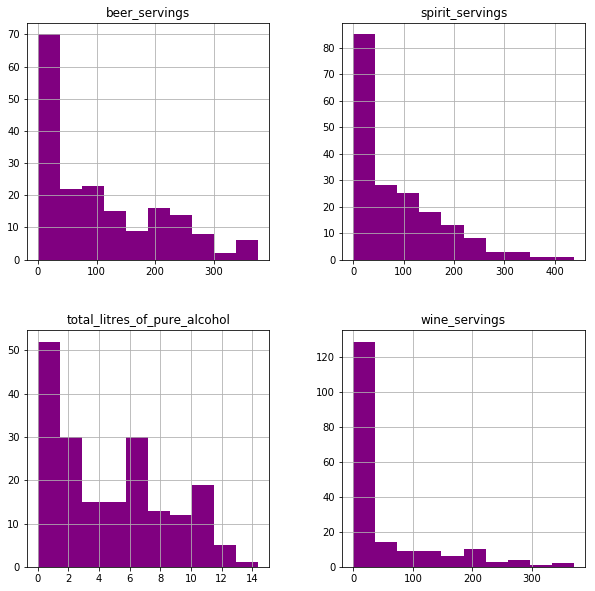

In [24]:
df.hist(figsize=(10,10),bins=10, color="purple")
plt.show()

In [25]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [26]:
#df['beer_servings'].fillna(df["beer_servings"].median(), inplace=True)
#df['beer_servings'].isnull().sum()

In [27]:
for i in ['beer_servings', 'spirit_servings', 'wine_servings','total_litres_of_pure_alcohol']:
    df[i].fillna(df[i].median(), inplace=True)

In [28]:
df.isnull().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

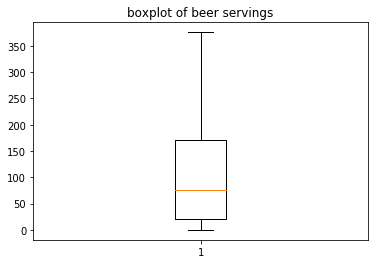

In [29]:
plt.boxplot(df['beer_servings'])
plt.title("boxplot of beer servings")
plt.show()

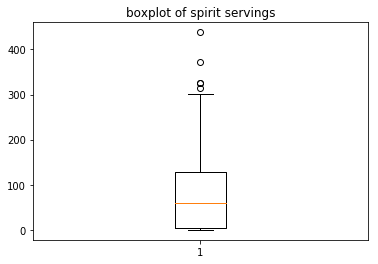

In [30]:
plt.boxplot(df['spirit_servings'])
plt.title("boxplot of spirit servings")
plt.show()

In [31]:
q1=np.percentile(df['spirit_servings'],25, interpolation="midpoint")
q2=np.percentile(df['spirit_servings'],50, interpolation="midpoint")
q3=np.percentile(df['spirit_servings'],75, interpolation="midpoint")

In [32]:
print(q1)
print(q2)
print(q3)

5.0
60.0
128.0


In [33]:
df["spirit_servings"].median()

60.0

In [34]:
IQR= q3-q1


In [35]:
IQR

123.0

In [36]:
lower_limit= q1 - 1.5*IQR
upper_limit= q3 + 1.5*IQR

print(lower_limit)
print(upper_limit)

-179.5
312.5


In [37]:
outlier=[]
for x in df["spirit_servings"]:
    if (x>upper_limit) or (x<lower_limit) :
        outlier.append(x)
    

In [38]:
outlier

[373.0, 438.0, 326.0, 326.0, 315.0]

In [39]:
#ind= df["spirit_servings"]>upper_limit
#df.loc[ind].index

In [40]:
#df.drop([15,68,141, 144], inplace =True)

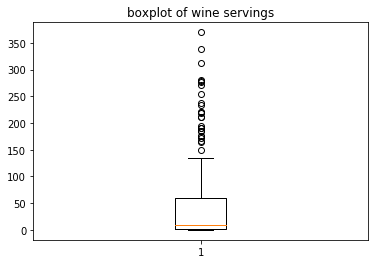

In [41]:
plt.boxplot(df['wine_servings'])
plt.title("boxplot of wine servings")
plt.show()

In [42]:
Q1=np.percentile(df['wine_servings'],25, interpolation="midpoint")
Q2=np.percentile(df['wine_servings'],50, interpolation="midpoint")
Q3=np.percentile(df['wine_servings'],75, interpolation="midpoint")

In [43]:
print(Q1)
print(Q2)
print(Q3)

1.0
9.0
59.0


In [44]:
iqr= Q3-Q1
print(iqr)

uplimit = Q3 + 1.5*iqr
lowlimit =Q1 - 1.5*iqr

print(uplimit)
print(lowlimit)

58.0
146.0
-86.0


In [45]:
df["wine_servings"].median()

9.0

In [46]:
outliers=[]
for x in df["wine_servings"]:
    if (x>upper_limit) or (x<lower_limit) :
        outliers.append(x)


In [47]:
outliers

[370.0, 339.0]

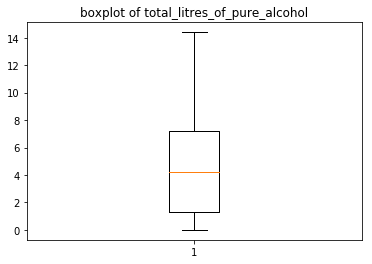

In [48]:
plt.boxplot(df['total_litres_of_pure_alcohol'])
plt.title("boxplot of total_litres_of_pure_alcohol")
plt.show()